# Given

Train data

|   x1  |   x2  |
|-------|-------|
| 1.84  | 4.61  |
| 5.66  | 4.80  |
| 6.35  | 3.29  |
| 2.90  | 4.61  |
|  ...  |  ...  |
| 1.25  | 4.93  |


and a quantity of clusters

# Calculate

Perform K-Means clustering and adjust centroids

# Solution

In [160]:
import numpy as np
import matplotlib.pyplot as plt

In [161]:
data = np.load("Lab1_data.npy")
data.shape

(300, 2)

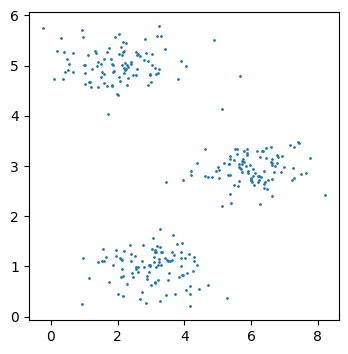

In [162]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(data[:,0], data[:,1], s=1)

Initialize centroids

In [163]:
m = 3 # 3 centroids

random_location = [int(idx) for idx in np.random.rand(m)*data.shape[0]]
random_points = data[random_location]
random_points = np.array([[2.05670542, 5.23391326], [2.17777173, 4.86154019], [2.95177039, 0.89583143]])

random_location, random_points

([51, 17, 183],
 array([[2.05670542, 5.23391326],
        [2.17777173, 4.86154019],
        [2.95177039, 0.89583143]]))

Case when resolution is wrong:

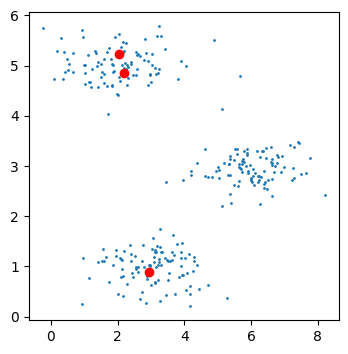

In [164]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(data[:,0], data[:,1], s=1)
ax.scatter(random_points[:,0], random_points[:,1], c='r')

In [165]:
# assign closest points

loss = []

for i in range(1000):

    assignment = []

    idx_loss = 0
    for point in data:

        distances = np.sum((random_points - point)**2, axis=1)
        min_distance = np.argmin(distances)
        assignment.append(min_distance)
        idx_loss += np.sum((random_points[min_distance] - point)**2, axis=0)

    if i > 0 and abs(idx_loss - loss[-1]) < 1 :
        break

    loss.append(idx_loss)

    assignment = np.array(assignment)

    # adjust centroids to new location (mean of all assignment)

    for idx in range(len(random_points)):
        mean = data[assignment==idx]
        random_points[idx] = np.mean(mean, axis=0)

print(loss)

# repeat until 
# * no value gain, or 
# * centroid left without a point

[1621.6634911525402, 867.5196005718877, 857.1181662951788]


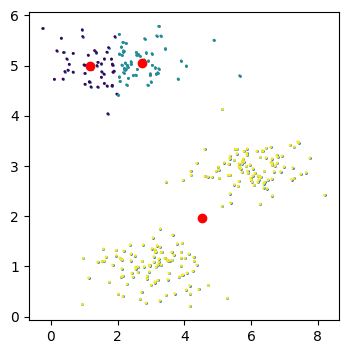

In [170]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(data[:,0], data[:,1], s=1)
ax.scatter(data[:,0], data[:,1], c=assignment, s=1)
ax.scatter(random_points[:,0], random_points[:,1], c='r')